In [11]:
import pandas
import re

from time import time

from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

url = 'data-pre-processing.csv'
dataframe = pandas.read_csv(url)

tokenizer = RegexpTokenizer("[\w']+")
stemmer = PorterStemmer()
vectorizer = TfidfVectorizer(stop_words='english')

corpus = []
corpusOriginal = []
corpusClassification = []

for videoId,author,date,content,classification in dataframe.values:
    comment = []
    corpusOriginal.append(content)
    content = content.lower()
    content = re.sub('(\s|\<)br\s*.\>', '', content)
    content = re.sub('(href.*)?http(.*)(\.com)?', 'HTTPWEBSITE', content)
    content = re.sub('[^A-Za-z0-9\s]+', '', content)
    corpusClassification.append(classification)
    for word in tokenizer.tokenize(content):
            word = stemmer.stem(word)
            comment.append(word)
    corpus.append(" ".join(comment))

print("Creating bag of words - vectorizer.fit_transform")
print(len(corpus))

vectorized =  vectorizer.fit_transform(corpus)

Creating bag of words - vectorizer.fit_transform
1956


Split and Merge - Creating Co-Association Matriz
Name k_means_youtube_1_12:
- Done fit in 10.794s
- Done voting in 3.176s
Name k_means_youtube_2_6:
- Done fit in 8.019s
- Done voting in 3.368s
Name k_means_youtube_3_41:
- Done fit in 19.218s
- Done voting in 4.726s
Name k_means_youtube_4_30:
- Done fit in 20.581s
- Done voting in 3.291s
Name k_means_youtube_5_13:
- Done fit in 10.065s
- Done voting in 3.121s
Name k_means_youtube_6_43:
- Done fit in 26.245s
- Done voting in 3.976s
Name k_means_youtube_7_14:
- Done fit in 11.093s
- Done voting in 3.125s
Name k_means_youtube_8_14:
- Done fit in 11.839s
- Done voting in 3.156s
Name k_means_youtube_9_27:
- Done fit in 18.023s
- Done voting in 5.951s
Name k_means_youtube_10_27:
- Done fit in 22.376s
- Done voting in 3.713s
Name k_means_youtube_11_12:
- Done fit in 10.753s
- Done voting in 3.094s
Name k_means_youtube_12_37:
- Done fit in 18.984s
- Done voting in 3.092s
Name k_means_youtube_13_8:
- Done fit in 11.487s
- Done voting in 5.104s
N

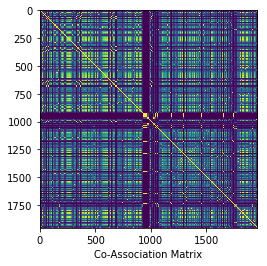

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pickle

from sklearn.cluster import KMeans, MiniBatchKMeans

print("Split and Merge - Creating Co-Association Matriz")

co_association = np.zeros((len(vectorized.toarray()), len(vectorized.toarray())))
max_k = 50
max_part = 70
vote = 1 / max_part

#Defining the estimators
estimators = []
for x in range(1, max_part + 1): #Closed range
    k = random.randint(2, max_k)
    key = 'k_means_youtube_' + str(x) + '_' + str(k)
    estimators.append((key, KMeans(n_clusters=k)))

#Split
for name, est in estimators:
    print("Name %s:" % (name))
    t0 = time()
    est.fit(vectorized.toarray())
    labels = est.labels_
    print("- Done fit in %0.3fs" % (time() - t0))
    
    #Combine
    t0 = time()
    res = np.array([[int(i == j) for i in labels] for j in labels])
    res = res * vote
    co_association = co_association + res
    print("- Done voting in %0.3fs" % (time() - t0))

pickle.dump(co_association, open("co_association-youtube.p", "wb"))
plt.xlabel('Co-Association Matrix')
plt.imshow(co_association)
plt.show()

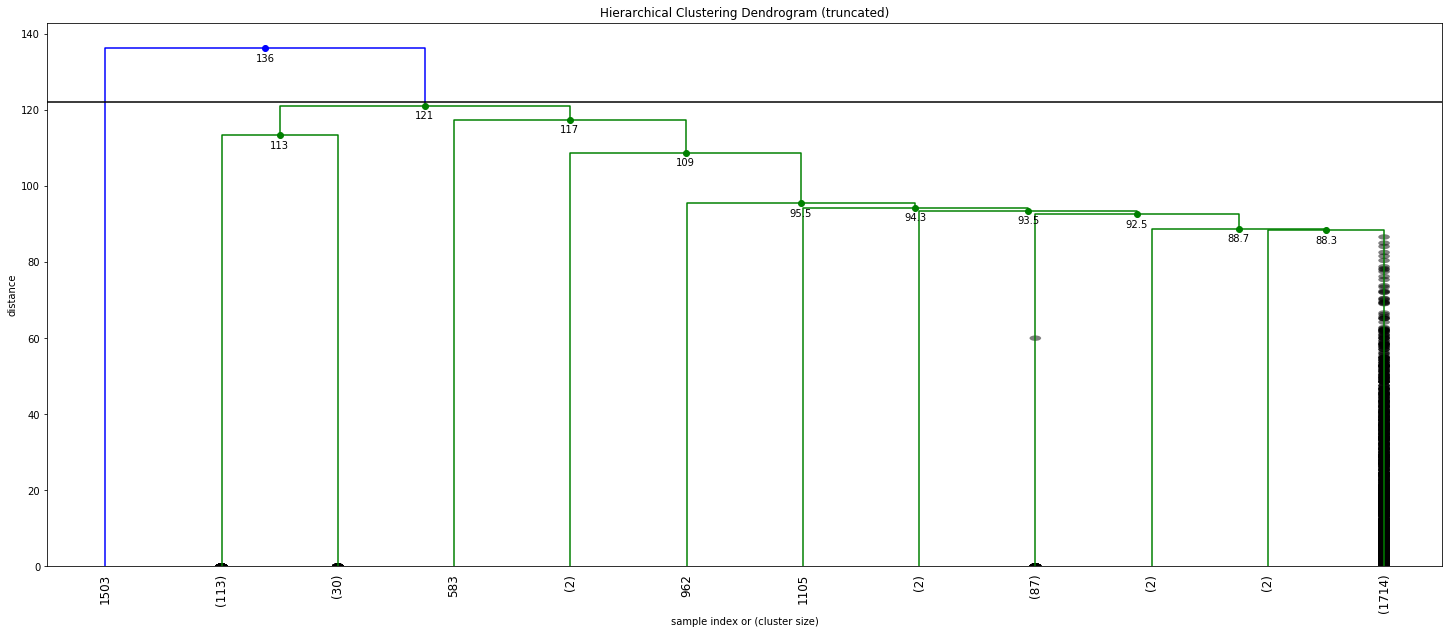

Cluster - 0

Cluster - 1
1 --> Huh, anyway check out this you[tube] channel: kobyoshi02
1 --> Hey guys check out my new channel and our first vid THIS IS US THE  MONKEYS!!! I'm the monkey in the white shirt,please leave a like comment  and please subscribe!!!!
1 --> just for test I have to say murdev.com
1 --> me shaking my sexy ass on my channel enjoy ^_^ ï»¿
1 --> watch?v=vtaRGgvGtWQ   Check this out .ï»¿
1 --> Hey, check out my new website!! This site is about kids stuff. kidsmediausa  . com
1 --> Subscribe to my channel ï»¿
1 --> i turned it on mute as soon is i came on i just wanted to check the  views...ï»¿
1 --> You should check my channel for Funny VIDEOS!!ï»¿
1 --> and u should.d check my channel and tell me what I should do next!ï»¿
1 --> Hey subscribe to meï»¿
1 -->  Once you have started reading do not stop. If you do not subscribe to me  within one day you and you're entire family will die so if you want to stay  alive subscribe right now.ï»¿
1 --> https://twitter.com/GBph

1 --> i like this song the video goes perfect with itï»¿
1 --> "....because I AM a champion...and you're gonna hear me roar!"   Today I AM my own champion  Today I AM a champion for the Creator  Today I AM doing positive in my world Today I AM blessing and healing all around me Today I AM successful and  creating success  ï»¿
1 --> #nowplaying "Weekendmix" track 04 : Katy Perry - Roar (DJ Denis Shmelev &amp	 DJ Alex Serov Remix) http://youtu.be/CevxZvSJLk8   Listen live at: www.smartfm.nl/livestream.htmlï»¿
1 --> Katy Perry's songs are the best of the songs of women artists.ï»¿
1 --> i like this song because of all the animals and i like this song .ï»¿
1 --> http://www.wattpad.com/story/26032883-she-can-love-you-goodï»¿
1 --> I love this song so much!:-D I've heard it so much I pretty much memorized  the lyricsï»¿
1 --> Hey Guys, I know you tend to skip these comments, but Take a look first.  I am Free Fire, A Big Room, Progressive House, Deep House, Dubstep &amp	  Chillstep Producer f

In [16]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import pickle

# calculate full dendrogram
# https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
max_d = 122
# co_association = pickle.load(open("co_association-youtube.p", "rb"))
Z = linkage(co_association, 'single', metric="cityblock")

plt.figure(figsize=(25, 10))
plt.title('Dendrogram - SL over Co-Association Matrix')
plt.ylabel('Distance')
fancy_dendrogram(
    Z,
    max_d=max_d,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12., # font size for the x axis abels,
    show_contracted=True  # to get a distribution impression in truncated branches
)
plt.show()

clusters = fcluster(Z, max_d, criterion='distance')
clusters_labels = max(clusters) + 1
for i in range(0, clusters_labels):
    print("Cluster - %d" % (i))
    for index, original in enumerate(corpusOriginal):
        if clusters[index] == i:
            print("%d --> %s" % (i, original))
    print()


In [6]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

In [15]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import pickle
from sklearn import metrics
from sklearn.metrics.cluster import normalized_mutual_info_score

# calculate full dendrogram
# https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/
max_d = 121
co_association = pickle.load(open("co_association-youtube.p", "rb"))

Z = linkage(co_association, 'single', metric="cityblock")
clusters = fcluster(Z, max_d, criterion='distance')


km = KMeans(n_clusters=18, init='k-means++', max_iter=1000, verbose=False)
km.fit(vectorized.toarray())
labels = km.labels_


print('Rand Ajustado: ')
print(metrics.adjusted_rand_score(labels, clusters))
print('NMI (Normalized Mutual Info score)')
print(normalized_mutual_info_score(labels, clusters))

Rand Ajustado: 
0.0804820292178
NMI (Normalized Mutual Info score)
0.331018638182
